In [1]:
### ValDXer testing
import os
os.environ["HDXER_PATH"] = "/home/alexi/Documents/HDXer"
from ValDX.ValidationDX import ValDXer
from ValDX.VDX_Settings import Settings
import pandas as pd
import MDAnalysis as mda
from MDAnalysis.coordinates.XTC import XTCWriter


settings = Settings(name='test_full0.5')
settings.replicates = 3
settings.gamma_range = (2,6)
settings.train_frac = 0.5
settings.RW_exponent = [0]
settings.split_mode = 'R3'
settings.stride = 1000
# settings.HDXer_stride = 10000

settings.RW_do_reweighting = False
settings.RW_do_params = True
import pickle

VDX = ValDXer(settings)
expt_name = 'Experimental'
test_name = "BRD4apo1_test"

import cProfile
import pstats

/home/alexi/Documents/ValDX


/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.50
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.51
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.52
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.53
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.54
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.55
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.56
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.57
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.58
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.59
Experiment name test_full0.5 already exists. Attem

In [1]:
import mdtraj as md

In [2]:
### add code to read in sequence from CIF file instead of copying it manually

cif_file = "raw_data/BRD4/BRD4_APO/AF-O60885-F1-model_v4.cif"

sequence_header = "_entity_poly.pdbx_seq_one_letter_code"
sequence = ""
seq_head_idx = 0
with open(cif_file, 'r') as f:
    lines = f.readlines()
    for idx, line in enumerate(lines):
        if sequence_header in line:
            seq_head_idx = idx+1
            break
    
    for idx, line in enumerate(lines[seq_head_idx:]):
        if idx > 0 and line[0] == ";":
            break
        sequence += line.strip()


# print(sequence)



# strip sequence of non letters
sequence = ''.join([i for i in sequence if i.isalpha()])

print(sequence)

print("Sequence length: ", len(sequence))


MSAESGPGTRLRNLPVMGDGLETSQMSTTQAQAQPQPANAASTNPPPPETSNPNKPKRQTNQLQYLLRVVLKTLWKHQFAWPFQQPVDAVKLNLPDYYKIIKTPMDMGTIKKRLENNYYWNAQECIQDFNTMFTNCYIYNKPGDDIVLMAEALEKLFLQKINELPTEETEIMIVQAKGRGRGRKETGTAKPGVSTVPNTTQASTPPQTQTPQPNPPPVQATPHPFPAVTPDLIVQTPVMTVVPPQPLQTPPPVPPQPQPPPAPAPQPVQSHPPIIAATPQPVKTKKGVKRKADTTTPTTIDPIHEPPSLPPEPKTTKLGQRRESSRPVKPPKKDVPDSQQHPAPEKSSKVSEQLKCCSGILKEMFAKKHAAYAWPFYKPVDVEALGLHDYCDIIKHPMDMSTIKSKLEAREYRDAQEFGADVRLMFSNCYKYNPPDHEVVAMARKLQDVFEMRFAKMPDEPEEPVVAVSSPAVPPPTKVVAPPSSSDSSSDSSSDSDSSTDDSEEERAQRLAELQEQLKAVHEQLAALSQPQQNKPKKKEKDKKEKKKEKHKRKEEVEENKKSKAKEPPPKKTKKNNSSNSNVSKKEPAPMKSKPPPTYESEEEDKCKPMSYEEKRQLSLDINKLPGEKLGRVVHIIQSREPSLKNSNPDEIEIDFETLKPSTLRELERYVTSCLRKKRKPQAEKVDVIAGSSKMKGFSSSESESSSESSSSDSEDSETEMAPKSKKKGHPGREQKKHHHHHHQQMQQAPAPVPQQPPPPPQQPPPPPPPQQQQQPPPPPPPPSMPQQAAPAMKSSPPPFIATQVPVLEPQLPGSVFDPIGHFTQPILHLPQPELPPHLPQPPEHSTPPHLNQHAVVSPPALHNALPQQPSRPSNRAAALPPKPARPPAVSPALTQTPLLPQPPMAQPPQVLLEDEEPPAPPLTSMQMQLYLQQLQKVQPPTPLLPSVKVQSQPPPPLPPPPHPSVQQQLQQQPPPPPPPQPQPPPQQQHQPPPRPVHLQ

In [3]:
# convert sequence to FASTA format
def write_fasta(sequence, header, file_name):
    """
    Writes a single-letter amino acid sequence to a FASTA file.
    
    Parameters:
    - sequence: A string containing the amino acid sequence.
    - header: A string to be used as the header in the FASTA file.
    - file_name: The name of the FASTA file to be created.
    """
    print(f"Writing sequence to {file_name}")
    with open(file_name, 'w') as fasta_file:
        # Write the header with the '>' symbol
        fasta_file.write(f">{header}\n")
        
        # Write the sequence in lines of 80 characters
        for i in range(0, len(sequence), 80):
            fasta_file.write(sequence[i:i+80] + "\n")


In [4]:
fasta_path = os.path.join("raw_data", "BRD4", 'BRD4_APO.fasta')
write_fasta(sequence, 'LXRa', fasta_path)


Writing sequence to raw_data/BRD4/BRD4_APO.fasta


In [5]:
raw_hdx_path = "raw_data/BRD4/BRD4_APO/ELN55049_AllResultsTables_Curated.csv"
raw_hdx = pd.read_csv(raw_hdx_path)
raw_hdx.head()

,State,DeutTime,Experiment,Protein,Start,End,Sequence,Adduct,Charge,Search RT,...,Theor Right %,Score,Cent Diff,Uptake,Deut %,Cent Diff 2,# Deut 2,Deut % 2,Mark,Confidence
0,apo BRD4(1-477) wt,0s,N66428_23_01_06,NaN,1,26,MSAESGPGTRLRNLPVMGDGLETSQM,H,3,10.23,...,NaN,0.8914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High
1,apo BRD4(1-477) wt,0s,N66428_23_01_06,NaN,5,26,SGPGTRLRNLPVMGDGLETSQM,H,3,9.78,...,NaN,0.8892,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium
2,apo BRD4(1-477) wt,0s,N66428_23_01_06,NaN,12,26,RNLPVMGDGLETSQM,H,2,9.06,...,NaN,0.7950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium
3,apo BRD4(1-477) wt,0s,N66428_23_01_06,NaN,15,26,PVMGDGLETSQM,H,2,8.10,...,NaN,0.8765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium
4,apo BRD4(1-477) wt,0s,N66428_23_01_06,NaN,27,40,STTQAQAQPQPANA,H,2,3.15,...,NaN,0.8932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High


In [6]:
# convert FD in DeutTime to -1
raw_hdx["Exposure"] = raw_hdx["DeutTime"].replace('FD', -1)

# remove 's' from Deuteration Time
raw_hdx["Exposure"] = raw_hdx["Exposure"].str.replace('s', '').astype(float)

# replace NaN with -1
raw_hdx["Exposure"].fillna(-1, inplace=True)

raw_hdx.head()

,State,DeutTime,Experiment,Protein,Start,End,Sequence,Adduct,Charge,Search RT,...,Score,Cent Diff,Uptake,Deut %,Cent Diff 2,# Deut 2,Deut % 2,Mark,Confidence,Exposure
0,apo BRD4(1-477) wt,0s,N66428_23_01_06,NaN,1,26,MSAESGPGTRLRNLPVMGDGLETSQM,H,3,10.23,...,0.8914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High,0.0
1,apo BRD4(1-477) wt,0s,N66428_23_01_06,NaN,5,26,SGPGTRLRNLPVMGDGLETSQM,H,3,9.78,...,0.8892,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium,0.0
2,apo BRD4(1-477) wt,0s,N66428_23_01_06,NaN,12,26,RNLPVMGDGLETSQM,H,2,9.06,...,0.7950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium,0.0
3,apo BRD4(1-477) wt,0s,N66428_23_01_06,NaN,15,26,PVMGDGLETSQM,H,2,8.10,...,0.8765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium,0.0
4,apo BRD4(1-477) wt,0s,N66428_23_01_06,NaN,27,40,STTQAQAQPQPANA,H,2,3.15,...,0.8932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High,0.0


In [7]:

# print entire dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
print(raw_hdx.loc[raw_hdx["Exposure"] == 0]["Uptake"])

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     NaN
11     NaN
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
20     NaN
21     NaN
22     NaN
23     NaN
24     NaN
25     NaN
26     NaN
27     NaN
28     NaN
29     NaN
30     NaN
31     NaN
32     NaN
33     NaN
34     NaN
35     NaN
36     NaN
37     NaN
38     NaN
39     NaN
40     NaN
41     NaN
42     NaN
43     NaN
44     NaN
45     NaN
46     NaN
47     NaN
48     NaN
49     NaN
50     NaN
51     NaN
52     NaN
53     NaN
54     NaN
55     NaN
56     NaN
57     NaN
58     NaN
59     NaN
60     NaN
61     NaN
62     NaN
63     NaN
64     NaN
65     NaN
66     NaN
67     NaN
68     NaN
69     NaN
70     NaN
71     NaN
72     NaN
73     NaN
74     NaN
75     NaN
76     NaN
77     NaN
78     NaN
79     NaN
80     NaN
81     NaN
82     NaN
83     NaN
84     NaN
85     NaN
86     NaN
87     NaN
88     NaN
89     NaN
90     NaN

In [8]:
print(raw_hdx.loc[raw_hdx["Exposure"] == 0].Uptake.value_counts(dropna=False))

# fill NaNs with 0
raw_hdx["Uptake"].fillna(0, inplace=True)

Uptake
NaN    678
Name: count, dtype: int64


In [9]:
# group by Start and End to extract peptide using ngroup
raw_hdx["Peptide"] = raw_hdx.groupby(["Start", "End"]).ngroup()

raw_hdx.head()



,State,DeutTime,Experiment,Protein,Start,End,Sequence,Adduct,Charge,Search RT,Actual RT,# Spectra,Search IMS,IMS Range,Peak Width,m/z Shift,Max Inty,Exp Cent,Exp Cent 2,L/R Ratio,Left %,Right %,Theor Cent,Theor Cent 2,Theor L/R,Theor Left %,Theor Right %,Score,Cent Diff,Uptake,Deut %,Cent Diff 2,# Deut 2,Deut % 2,Mark,Confidence,Exposure,Peptide
0,apo BRD4(1-477) wt,0s,N66428_23_01_06,NaN,1,26,MSAESGPGTRLRNLPVMGDGLETSQM,H,3,10.23,10.15-10.34,15,73,73-77,0.076,-0.003,43000.0,912.711,NaN,NaN,NaN,NaN,912.703,NaN,NaN,NaN,NaN,0.8914,NaN,0.0,NaN,NaN,NaN,NaN,NaN,High,0.0,0
1,apo BRD4(1-477) wt,0s,N66428_23_01_06,NaN,5,26,SGPGTRLRNLPVMGDGLETSQM,H,3,9.78,9.63-9.93,23,59,58-62,0.062,-0.003,53100.0,773.210,NaN,NaN,NaN,NaN,773.214,NaN,NaN,NaN,NaN,0.8892,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Medium,0.0,1
2,apo BRD4(1-477) wt,0s,N66428_23_01_06,NaN,12,26,RNLPVMGDGLETSQM,H,2,9.06,8.95-9.17,17,83,79-84,0.070,-0.004,49900.0,825.148,NaN,NaN,NaN,NaN,824.943,NaN,NaN,NaN,NaN,0.7950,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Medium,0.0,2
3,apo BRD4(1-477) wt,0s,N66428_23_01_06,NaN,15,26,PVMGDGLETSQM,H,2,8.10,7.97-8.26,21,59,60-64,0.046,-0.003,260000.0,633.256,NaN,NaN,NaN,NaN,633.222,NaN,NaN,NaN,NaN,0.8765,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Medium,0.0,3
4,apo BRD4(1-477) wt,0s,N66428_23_01_06,NaN,27,40,STTQAQAQPQPANA,H,2,3.15,3.12-3.18,6,67,67-71,0.048,-0.004,123000.0,707.234,NaN,NaN,NaN,NaN,707.240,NaN,NaN,NaN,NaN,0.8932,NaN,0.0,NaN,NaN,NaN,NaN,NaN,High,0.0,4


In [10]:
# average Uptake for each peptide and Exposure
hdx = raw_hdx.groupby(["Start","End","Peptide", "Exposure"])["Uptake"].mean().reset_index()

print(hdx)

     Start  End  Peptide  Exposure     Uptake
0        1   26        0      -1.0  12.349000
1        1   26        0       0.0   0.000000
2        1   26        0      15.0  12.489667
3        1   26        0      60.0  12.501167
4        1   26        0     600.0  11.816333
5        1   26        0    3600.0  11.879167
6        1   26        0   14400.0  12.032500
7        5   26        1      -1.0   9.449000
8        5   26        1       0.0   0.000000
9        5   26        1      15.0   9.666167
10       5   26        1      60.0   9.679167
11       5   26        1     600.0   8.832167
12       5   26        1    3600.0   8.472333
13       5   26        1   14400.0   8.491000
14      12   26        2      -1.0   5.880000
15      12   26        2       0.0   0.000000
16      12   26        2      15.0   6.359833
17      12   26        2      60.0   6.443833
18      12   26        2     600.0   5.868667
19      12   26        2    3600.0   5.611167
20      12   26        2   14400.0

In [11]:
# select Exposure -1
max_uptake = hdx.loc[hdx["Exposure"] == -1]["Uptake"].values

print(max_uptake)

no_exposure_times = hdx["Exposure"].unique()
print(len(no_exposure_times))

# extend max_uptake to all Exposure times (each elemetn should be repeated len(no_exposure_times) times) ie [[m]*no_exposure_times for m in max_uptake]
max_uptake = [m for m in max_uptake for _ in range(len(no_exposure_times))]
print(max_uptake)


# add max_uptake to hdx
hdx["MaxUptake"] = max_uptake


[12.349   9.449   5.88    5.077   4.879   8.107   9.645   3.618   3.651
  4.143   9.551  11.054   6.741   3.88    5.662   3.42    5.618   2.313
  7.262   4.0885  2.523   4.952   7.062  12.985   4.04    6.118   8.555
  2.452   1.847   4.142   5.208   6.522   7.59    8.252  12.605  13.333
  2.73    4.052   4.728   5.944   4.94    4.494   3.14    2.868   3.777
  3.106   4.079   5.24    3.956   2.232   4.002   3.537   2.011   3.278
  7.978   7.453   4.925   4.925   3.725   2.215   7.208   4.614   2.749
  4.004   4.894   3.174   4.343   2.72    2.278   3.751   7.4     3.01
  3.025   3.268   5.929   7.203   8.071   7.82    2.37    3.813   2.967
  8.41   10.384   4.042   7.645   3.586   6.63    8.097  10.881   4.782
  5.58    4.009   2.896   3.411   6.377   3.9325  4.972   3.106   5.926
  3.843   5.407   5.096   8.565   2.667 ]
7
[12.349, 12.349, 12.349, 12.349, 12.349, 12.349, 12.349, 9.449, 9.449, 9.449, 9.449, 9.449, 9.449, 9.449, 5.88, 5.88, 5.88, 5.88, 5.88, 5.88, 5.88, 5.077, 5.077, 5.0

In [12]:
print(hdx)

     Start  End  Peptide  Exposure     Uptake  MaxUptake
0        1   26        0      -1.0  12.349000    12.3490
1        1   26        0       0.0   0.000000    12.3490
2        1   26        0      15.0  12.489667    12.3490
3        1   26        0      60.0  12.501167    12.3490
4        1   26        0     600.0  11.816333    12.3490
5        1   26        0    3600.0  11.879167    12.3490
6        1   26        0   14400.0  12.032500    12.3490
7        5   26        1      -1.0   9.449000     9.4490
8        5   26        1       0.0   0.000000     9.4490
9        5   26        1      15.0   9.666167     9.4490
10       5   26        1      60.0   9.679167     9.4490
11       5   26        1     600.0   8.832167     9.4490
12       5   26        1    3600.0   8.472333     9.4490
13       5   26        1   14400.0   8.491000     9.4490
14      12   26        2      -1.0   5.880000     5.8800
15      12   26        2       0.0   0.000000     5.8800
16      12   26        2      1

In [13]:
hdx['UptakeFraction'] = hdx['Uptake'] / hdx['MaxUptake']

hdx.head()

,Start,End,Peptide,Exposure,Uptake,MaxUptake,UptakeFraction
0,1,26,0,-1.0,12.349000,12.349,1.000000
1,1,26,0,0.0,0.000000,12.349,0.000000
2,1,26,0,15.0,12.489667,12.349,1.011391
3,1,26,0,60.0,12.501167,12.349,1.012322
4,1,26,0,600.0,11.816333,12.349,0.956866


In [14]:
# remove Exposure -1
hdx = hdx.loc[hdx["Exposure"] != -1]

hdx.head()

,Start,End,Peptide,Exposure,Uptake,MaxUptake,UptakeFraction
1,1,26,0,0.0,0.000000,12.349,0.000000
2,1,26,0,15.0,12.489667,12.349,1.011391
3,1,26,0,60.0,12.501167,12.349,1.012322
4,1,26,0,600.0,11.816333,12.349,0.956866
5,1,26,0,3600.0,11.879167,12.349,0.961954


In [15]:

# pivot exposure and uptake fraction
hdx = hdx.groupby(['Start', 'End', 'Exposure'])['UptakeFraction'].mean().reset_index()

print(hdx)




     Start  End  Exposure  UptakeFraction
0        1   26       0.0        0.000000
1        1   26      15.0        1.011391
2        1   26      60.0        1.012322
3        1   26     600.0        0.956866
4        1   26    3600.0        0.961954
5        1   26   14400.0        0.974370
6        5   26       0.0        0.000000
7        5   26      15.0        1.022983
8        5   26      60.0        1.024359
9        5   26     600.0        0.934720
10       5   26    3600.0        0.896638
11       5   26   14400.0        0.898614
12      12   26       0.0        0.000000
13      12   26      15.0        1.081604
14      12   26      60.0        1.095890
15      12   26     600.0        0.998073
16      12   26    3600.0        0.954280
17      12   26   14400.0        0.949887
18      15   26       0.0        0.000000
19      15   26      15.0        0.937365
20      15   26      60.0        0.966910
21      15   26     600.0        0.928829
22      15   26    3600.0        0

In [16]:
# clamp UptakeFraction to 1
hdx["UptakeFraction"] = hdx["UptakeFraction"].clip(upper=1)
print(hdx)


     Start  End  Exposure  UptakeFraction
0        1   26       0.0        0.000000
1        1   26      15.0        1.000000
2        1   26      60.0        1.000000
3        1   26     600.0        0.956866
4        1   26    3600.0        0.961954
5        1   26   14400.0        0.974370
6        5   26       0.0        0.000000
7        5   26      15.0        1.000000
8        5   26      60.0        1.000000
9        5   26     600.0        0.934720
10       5   26    3600.0        0.896638
11       5   26   14400.0        0.898614
12      12   26       0.0        0.000000
13      12   26      15.0        1.000000
14      12   26      60.0        1.000000
15      12   26     600.0        0.998073
16      12   26    3600.0        0.954280
17      12   26   14400.0        0.949887
18      15   26       0.0        0.000000
19      15   26      15.0        0.937365
20      15   26      60.0        0.966910
21      15   26     600.0        0.928829
22      15   26    3600.0        0

In [17]:
# conver to HDXer format ie start, end, exposure_1, exposure_2 

# pivot so that exposure time is the column name drop the exposure column
hdx = hdx.pivot(index=['Start', 'End'], columns='Exposure', values='UptakeFraction').reset_index()

# change Start to ResStr and End to ResEnd
hdx = hdx.rename(columns={'Start': 'ResStr', 'End': 'ResEnd'})

# drop the exposure column
hdx.columns.name = None

print(hdx)


     ResStr  ResEnd  0.0      15.0      60.0     600.0    3600.0   14400.0
0         1      26  0.0  1.000000  1.000000  0.956866  0.961954  0.974370
1         5      26  0.0  1.000000  1.000000  0.934720  0.896638  0.898614
2        12      26  0.0  1.000000  1.000000  0.998073  0.954280  0.949887
3        15      26  0.0  0.937365  0.966910  0.928829  0.954829  0.969864
4        27      40  0.0  1.000000  1.000000  1.000000  1.000000  1.000000
5        41      63  0.0  0.854488  0.940874  0.895296  0.881008  0.918404
6        41      65  0.0  0.757059  0.850959  0.838863  0.878279  0.962744
7        66      72  0.0  0.019900  0.030542  0.081491  0.141008  0.214069
8        68      74  0.0  0.036246  0.090386  0.257190  0.366703  0.536018
9        69      78  0.0  0.174511  0.242779  0.475782  0.627323  0.800909
10       69      88  0.0  0.183593  0.239626  0.447911  0.570062  0.686630
11       69      91  0.0  0.178940  0.250633  0.497693  0.647518  0.767490
12       75      91  0.0 

In [18]:
print(hdx)


     ResStr  ResEnd  0.0      15.0      60.0     600.0    3600.0   14400.0
0         1      26  0.0  1.000000  1.000000  0.956866  0.961954  0.974370
1         5      26  0.0  1.000000  1.000000  0.934720  0.896638  0.898614
2        12      26  0.0  1.000000  1.000000  0.998073  0.954280  0.949887
3        15      26  0.0  0.937365  0.966910  0.928829  0.954829  0.969864
4        27      40  0.0  1.000000  1.000000  1.000000  1.000000  1.000000
5        41      63  0.0  0.854488  0.940874  0.895296  0.881008  0.918404
6        41      65  0.0  0.757059  0.850959  0.838863  0.878279  0.962744
7        66      72  0.0  0.019900  0.030542  0.081491  0.141008  0.214069
8        68      74  0.0  0.036246  0.090386  0.257190  0.366703  0.536018
9        69      78  0.0  0.174511  0.242779  0.475782  0.627323  0.800909
10       69      88  0.0  0.183593  0.239626  0.447911  0.570062  0.686630
11       69      91  0.0  0.178940  0.250633  0.497693  0.647518  0.767490
12       75      91  0.0 

In [19]:

hdx = hdx.round(5)
hdx.to_csv(os.path.join("raw_data", "BRD4", 'BRD4_APO.dat'), sep=' ', index=False)


In [20]:
segs = raw_hdx[['Start', 'End']].drop_duplicates().sort_values(by=['Start', 'End']).reset_index(drop=True)


In [21]:

# convert to list of tuples
segs = [tuple(x) for x in segs.values]

print(segs)


[(1, 26), (5, 26), (12, 26), (15, 26), (27, 40), (41, 63), (41, 65), (66, 72), (68, 74), (69, 78), (69, 88), (69, 91), (75, 91), (78, 88), (78, 91), (79, 88), (79, 91), (82, 88), (89, 102), (89, 106), (92, 99), (92, 102), (92, 106), (92, 117), (93, 102), (98, 111), (98, 117), (100, 106), (103, 111), (103, 113), (103, 114), (103, 116), (103, 117), (103, 118), (103, 124), (103, 125), (107, 113), (107, 116), (107, 117), (107, 118), (114, 124), (114, 125), (118, 124), (125, 131), (125, 132), (126, 132), (130, 137), (136, 148), (138, 148), (144, 151), (148, 155), (149, 155), (149, 156), (150, 156), (157, 172), (158, 172), (161, 172), (162, 173), (165, 172), (365, 371), (365, 381), (369, 381), (372, 378), (372, 381), (372, 383), (382, 390), (382, 392), (383, 390), (384, 390), (389, 399), (389, 407), (390, 399), (391, 399), (391, 400), (391, 404), (391, 406), (391, 407), (391, 410), (400, 406), (400, 407), (401, 407), (407, 424), (407, 425), (408, 425), (411, 425), (418, 425), (426, 441), (42

In [22]:


# write list as new lines with space delimiter
with open(os.path.join("raw_data", "BRD4", 'BRD4_APO_segs.txt'), 'w') as f:
    for item in segs:
        f.write("%s\n" % ' '.join(map(str, item)))

In [23]:
# from pdbfixer import PDBFixer
# from openmm.app import PDBFile

# BPTI_dir = "/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/BRD4/BRD4_APO"
# sim_dir = os.path.join(BPTI_dir, "alphafold_quick")

# pdb_list = [f for f in os.listdir(sim_dir) if f.endswith('.pdb')]

# print(pdb_list) 


# H_sim_dir = os.path.join(BPTI_dir, "alphafold_H")

# os.makedirs(H_sim_dir, exist_ok=True)

# for pdb in pdb_list:
#     fixer = PDBFixer(os.path.join(sim_dir, pdb))
#     fixer.addMissingHydrogens(7.0)
#     H_pdb_name = pdb.replace('.pdb', '_H.pdb')
#     PDBFile.writeFile(fixer.topology, fixer.positions, open(os.path.join(H_sim_dir, H_pdb_name), 'w'), keepIds=True)

# pdb_list = [f for f in os.listdir(H_sim_dir) if f.endswith('.pdb')]



Generate conformations with Alphafold

# need to find out how to generate a wide range of conformations

In [24]:
def pre_process_main():
    # BPTI data
    BPTI_dir = "/home/alexi/Documents/ValDX/raw_data/BRD4/BRD4_APO"

    # BPTI_dir = "/home/alexi/Documents/ValDX/raw_data/HDXer_tutorial/BPTI"

    os.listdir(BPTI_dir)

    segs_name = "BRD4_APO_segs.txt"
    segs_path = os.path.join(BPTI_dir, segs_name)

    hdx_name = "BRD4_APO.dat"
    hdx_path = os.path.join(BPTI_dir, hdx_name)
    print(hdx_path)

    rates_name = "out__train_MD_Simulated_1Intrinsic_rates.dat"
    rates_path = os.path.join(BPTI_dir, rates_name)
    sim_name = 'BRD4_AF'

    sim_dir = os.path.join(BPTI_dir, "alphafold_quick")

    pdb_list = [f for f in os.listdir(sim_dir) if f.endswith('.pdb')]

    print(pdb_list) 


    H_sim_dir = os.path.join(BPTI_dir, "alphafold_H")

    os.makedirs(H_sim_dir, exist_ok=True)

    for pdb in pdb_list:
        continue
        fixer = PDBFixer(os.path.join(sim_dir, pdb))
        fixer.addMissingHydrogens(7.0)
        H_pdb_name = pdb.replace('.pdb', '_H.pdb')
        PDBFile.writeFile(fixer.topology, fixer.positions, open(os.path.join(H_sim_dir, H_pdb_name), 'w'), keepIds=True)

    pdb_list = [f for f in os.listdir(H_sim_dir) if f.endswith('.pdb')]
    print(pdb_list)

    top_path = os.path.join(H_sim_dir, pdb_list[0])
    pdb_paths = [os.path.join(H_sim_dir, i) for i in pdb_list]

    print("top",top_path)


    print(pdb_paths)

    small_traj_path = top_path.replace(".pdb","_small.xtc")
    # small_traj_path = os.path.join(sim_dir, small_traj_name)

    u = mda.Universe(top_path, pdb_paths)

    print(small_traj_path)
        
    with XTCWriter(small_traj_path, n_atoms=u.atoms.n_atoms) as W:
        for ts in u.trajectory:
            W.write(u.atoms)

    # traj_paths = [os.path.join(sim_dir, i) for i in os.listdir(sim_dir) if i.endswith(".pdb")]
    
    traj_paths = [small_traj_path]
    print(traj_paths)
    return hdx_path, segs_path, rates_path, top_path, traj_paths, sim_name, expt_name, test_name


In [25]:
hdx_path, segs_path, rates_path, top_path, traj_paths, sim_name, expt_name, test_name = pre_process_main()

/home/alexi/Documents/ValDX/raw_data/BRD4/BRD4_APO/BRD4_APO.dat
['BRD4_apo_unrelaxed_rank_003_alphafold2_ptm_model_5_seed_000.pdb', 'BRD4_apo_unrelaxed_rank_002_alphafold2_ptm_model_1_seed_000.pdb', 'BRD4_apo_unrelaxed_rank_004_alphafold2_ptm_model_4_seed_000.pdb', 'BRD4_apo_unrelaxed_rank_005_alphafold2_ptm_model_3_seed_000.pdb', 'BRD4_apo_unrelaxed_rank_001_alphafold2_ptm_model_2_seed_000.pdb']
['BRD4_apo_unrelaxed_rank_002_alphafold2_ptm_model_1_seed_000_H.pdb', 'BRD4_apo_unrelaxed_rank_004_alphafold2_ptm_model_4_seed_000_H.pdb', 'BRD4_apo_unrelaxed_rank_003_alphafold2_ptm_model_5_seed_000_H.pdb', 'BRD4_apo_unrelaxed_rank_005_alphafold2_ptm_model_3_seed_000_H.pdb', 'BRD4_apo_unrelaxed_rank_001_alphafold2_ptm_model_2_seed_000_H.pdb']
top /home/alexi/Documents/ValDX/raw_data/BRD4/BRD4_APO/alphafold_H/BRD4_apo_unrelaxed_rank_002_alphafold2_ptm_model_1_seed_000_H.pdb
['/home/alexi/Documents/ValDX/raw_data/BRD4/BRD4_APO/alphafold_H/BRD4_apo_unrelaxed_rank_002_alphafold2_ptm_model_1_seed_

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/base.py:721: UserWarning: Reader has no dt information, set to 1.0 ps
  return self.ts.dt
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/XTC.py:105: UserWarning: Reader has no dt information, set to 1.0 ps
  time = ts.time


/home/alexi/Documents/ValDX/raw_data/BRD4/BRD4_APO/alphafold_H/BRD4_apo_unrelaxed_rank_002_alphafold2_ptm_model_1_seed_000_H_small.xtc
['/home/alexi/Documents/ValDX/raw_data/BRD4/BRD4_APO/alphafold_H/BRD4_apo_unrelaxed_rank_002_alphafold2_ptm_model_1_seed_000_H_small.xtc']


In [26]:
# # BPTI data
# BPTI_dir = "/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI"
# # BPTI_dir = "/home/alexi/Documents/ValDX/raw_data/HDXer_tutorial/BPTI"


In [27]:
# expt_dir = os.path.join(BPTI_dir, "BPTI_expt_data")

# os.listdir(expt_dir)

# segs_name = "BPTI_residue_segs.txt"
# segs_path = os.path.join(expt_dir, segs_name)

# hdx_name = "BPTI_expt_dfracs.dat"
# hdx_path = os.path.join(expt_dir, hdx_name)
# print(hdx_path)

# rates_name = "BPTI_Intrinsic_rates.dat"
# rates_path = os.path.join(expt_dir, rates_name)


In [28]:
# sim_name = 'BPTI_MD'

# sim_dir = os.path.join(BPTI_dir, "BPTI_simulations")

# os.listdir(sim_dir)

# md_reps = 1
# rep_dirs = ["Run_"+str(i+1) for i in range(md_reps)]

# top_name = "bpti_5pti_eq6_protonly.gro"

# top_path = os.path.join(sim_dir, rep_dirs[0], top_name)

# traj_name = "bpti_5pti_reimg_protonly.xtc"

# traj_paths = [os.path.join(sim_dir, rep_dir, traj_name) for rep_dir in rep_dirs]

# print(top_path)
# print(traj_paths)




In [29]:
def run_split_test(split_mode, name, system):

    # settings.split_mode = 'R'
    settings.split_mode = split_mode
    settings.name = "_".join([name, split_mode])
    settings.times = [0.0, 15.0, 60.0, 600.0, 3600.0, 14400.0]
    VDX = ValDXer(settings)

    VDX.load_HDX_data(HDX_path=hdx_path, SEG_path=segs_path, calc_name=expt_name)
    # VDX.load_intrinsic_rates(path=rates_path, calc_name=expt_name)

    VDX.load_structures(top_path=top_path, traj_paths=traj_paths, calc_name=test_name)

    run_outputs = VDX.run_VDX(calc_name=test_name, expt_name=expt_name)
    analysis_dump, df, name = VDX.dump_analysis()
    save_path = VDX.save_experiment()

    return run_outputs, analysis_dump, df, name, save_path

In [30]:

splits = ['S', 'SR', 'Sp']
split_names = ['AvsB', 'LvsX', 'mixAandB']
system = 'BPTITtut_test'

raw_run_outputs = {}
analysis_dumps = {}
analysis_df = pd.DataFrame()
names = []
save_paths = []

pr = cProfile.Profile()
pr.enable()


for split, split_name in zip(splits, split_names):
    run_outputs, analysis_dump, df, name, save_path = run_split_test(split, split_name, system)
    raw_run_outputs[name] = run_outputs
    analysis_dumps.update(analysis_dump)
    analysis_df = pd.concat([analysis_df, df])
    names.append(name)
    save_paths.append(save_path)

pr.disable()
ps = pstats.Stats(pr).sort_stats('cumulative')


Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S0
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S1
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S2
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S3
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S4
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S5
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S6
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S7
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S8
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S9
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S10
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S11
Experiment name 

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/XDR.py:241: UserWarning: Reload offsets from trajectory
 ctime or size or n_atoms did not match
  warnings.warn("Reload offsets from trajectory\n "
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:733: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

Structures loaded BRD4apo1_test: 
BRD4apo1_test Topology: <Universe with 21407 atoms>
BRD4apo1_test Trajectory: <Universe with 21407 atoms>
BRD4apo1_test Traj: no frames 5
Random seeds: [42, 43, 44]
Splitting segments for BRD4apo1_test by spatial split: PCA1D
HDX residues:  [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 365 366 367 368 369 370

KeyboardInterrupt: 

/home/alexi/Documents/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a


Residue predictions complete


/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=o

In [ ]:
ps = pstats.Stats(pr).sort_stats('cumulative')
ps.print_stats()

         67331921 function calls (66315780 primitive calls) in 200.625 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    0.000    0.000  200.641  100.321 /home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3472(run_code)
     12/2    0.000    0.000  200.641  100.321 {built-in method builtins.exec}
        1    0.000    0.000  200.641  200.641 /tmp/ipykernel_585865/742124640.py:15(<module>)
        3    0.000    0.000  200.640   66.880 /tmp/ipykernel_585865/853554474.py:1(run_split_test)
        3    0.001    0.000  197.643   65.881 /home/alexi/Documents/ValDX/ValDX/ValidationDX.py:590(run_VDX)
        3    0.000    0.000   91.856   30.619 /home/alexi/Documents/ValDX/ValDX/ValidationDX.py:663(train_HDX)
     4483   91.726    0.020   91.726    0.020 {method 'acquire' of '_thread.lock' objects}
      640    0.002    0.000   91.553    0.143 /home/alexi/anaconda3/envs/HD

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


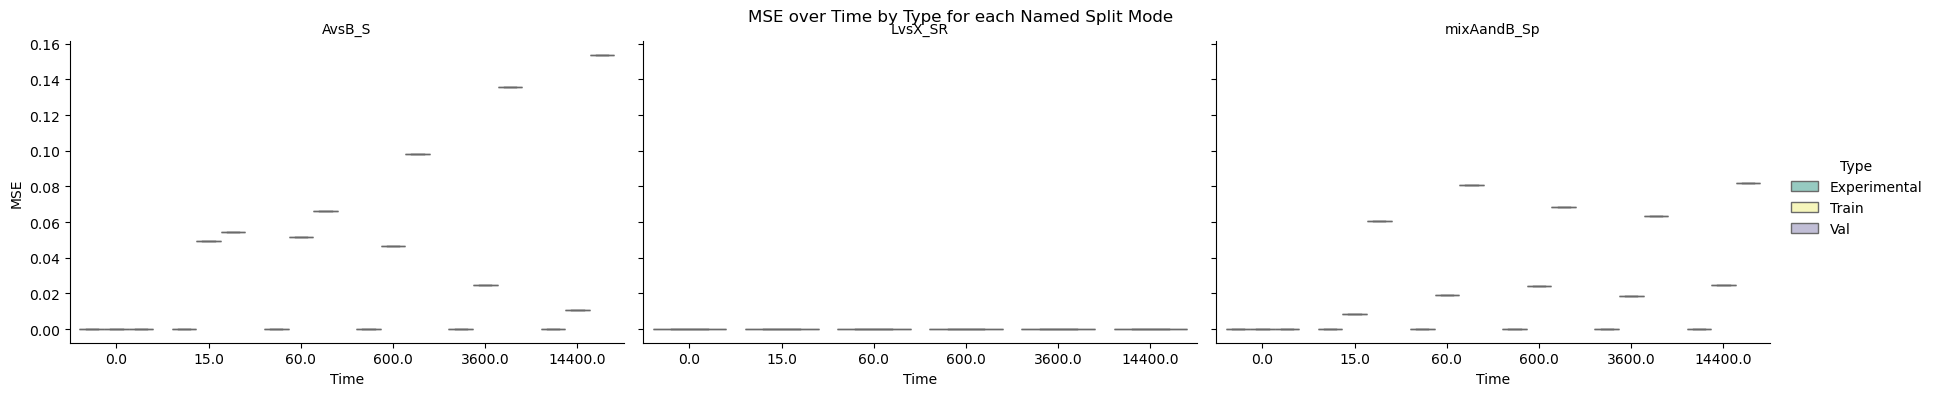

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Replace 'your_dataframe' with your actual DataFrame variable
df = analysis_df

# Create a FacetGrid, using 'name' for each subplot
g = sns.FacetGrid(df, col="name", col_wrap=3, height=4, aspect=1.5)
g.fig.suptitle('MSE over Time by Type for each Named Split Mode')

# Create boxplots
g = g.map(sns.boxplot, "time", "mse", "Type", palette="Set3")

# Adding some additional options for better visualization
g.add_legend(title='Type')
g.set_axis_labels("Time", "MSE")
g.set_titles("{col_name}")

# Adjust the arrangement of the plots
plt.subplots_adjust(top=0.9)

# Show plot
plt.show()


/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


UnboundLocalError: local variable 'boxprops' referenced before assignment

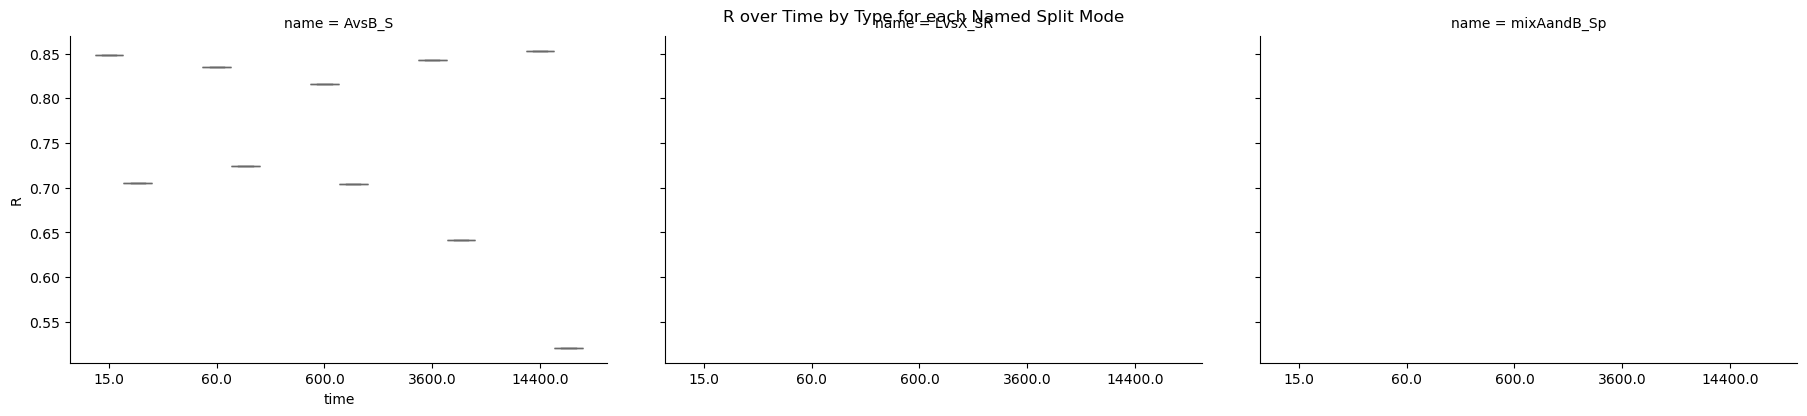

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Replace 'your_dataframe' with your actual DataFrame variable
df = analysis_df

# Create a FacetGrid, using 'name' for each subplot
g = sns.FacetGrid(df, col="name", col_wrap=3, height=4, aspect=1.5)
g.fig.suptitle('R over Time by Type for each Named Split Mode')

# Create boxplots
g = g.map(sns.boxplot, "time", "R", "Type", palette="Set3")

# Adding some additional options for better visualization
g.add_legend(title='Type')
g.set_axis_labels("Time", "R")
g.set_titles("{col_name}")

# Adjust the arrangement of the plots
plt.subplots_adjust(top=0.9)

# Show plot
plt.show()


In [ ]:
# plot LogPfs by Residues colour by calc_name facet wrap by name
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
LogPfs = pd.concat([analysis_dumps[i]["LogPfs"] for i in names])

print(LogPfs)

LogPfs_df = LogPfs.explode(['LogPf','Residues'])


# Create a FacetGrid, using 'name' for each subplot
g = sns.FacetGrid(LogPfs_df, col="name", col_wrap=3, height=4, aspect=1.5)
g.fig.suptitle('LogPfs over Residues for each Named Split Mode')

# Create lineplots
g = g.map(sns.lineplot, "Residues", "LogPf", "calc_name", palette="Set2")

# Adding some additional options for better visualization
g.add_legend(title='calc_name')
g.set_axis_labels("Residues", "LogPf")
g.set_titles("{col_name}")

# Adjust the arrangement of the plots
plt.subplots_adjust(top=0.9)

# Show plot
plt.show()


In [ ]:
# from MDAnalysis.analysis.dssp import DSSP



In [ ]:
# VDX.paths.head()

In [ ]:
# print(top_path)

In [ ]:
# pdb_test = mda.Universe(top_path)

# # write out as a pdb and add header
# pdb_test.atoms.write('test.pdb')
# with open('test.pdb', 'r') as original: data = original.read()
# with open('test.pdb', 'w') as modified: modified.write('HEADER    '+sim_name+'\n'+data)



In [ ]:


# def PDB_to_DSSP(top_path: str, dssp_path: str=None, sim_name: str=None):
#     """
#     Run DSSP on a PDB file to generate a DSSP file. Reads the output and returns a list of secondary structure elements.
#     Secondary structure elements are reduced to a single character: H (alpha helix), S (beta sheet), or L (loop).
#     Args:
#     - top_path (str): The path to the topology file to create the PDB file from.
#     - dssp_path (str): The path to save the DSSP file.
#     - sim_name (str): Simulation name to be included in the HEADER of the PDB file.
#     Returns:
#     - List of tuples, each containing the residue number and its secondary structure element.
#     """
#     temp_pdb = "do_mkdssp.pdb"

#     if sim_name is None:
#         sim_name = "DSSP HEADER"
#     if dssp_path is None:
#         dssp_path = "dssp_file.dssp"
#     print(top_path)
#     pdb_test = mda.Universe(top_path)

#     # write out as a pdb and add header
#     pdb_test.atoms.write(temp_pdb)


#     with open(temp_pdb, 'r') as original: data = original.read()
#     with open(temp_pdb, 'w') as modified: modified.write('HEADER    '+sim_name+'\n'+data)

#     # Run mkdssp to generate DSSP file
#     try:
#         subprocess.run(['mkdssp', temp_pdb,  dssp_path], check=True)
#     except subprocess.CalledProcessError as e:
#         print(f"Error running DSSP: {e}")
#         return []

#     # Parse the DSSP file
#     secondary_structures = []
#     with open(dssp_path, 'r') as dssp_file:
#         # Skip header lines
#         for line in dssp_file:
#             if line.startswith('  #  RESIDUE AA'):
#                 break
#         # Read the secondary structure assignments
#         for line in dssp_file:
#             if len(line) > 13:  # Ensure line has enough data
#                 residue_num = line[5:10].strip()
#                 ss = line[16]
#                 # Simplify the secondary structure to H, S, or L
#                 if ss in 'GHI':
#                     ss = 'H'  # Helix
#                 elif ss in 'EB':
#                     ss = 'S'  # Sheet
#                 else:
#                     ss = 'L'  # Loop or other
#                 secondary_structures.append((residue_num, ss))

#     # Cleanup temp PDB file
#     os.remove(temp_pdb)
#     os.remove(dssp_path)
#     print(len(secondary_structures))
#     print(len(pdb_test.residues))
#     return secondary_structures

